<div align=center>
		
<p></p>
<p></p>
<font size=5>
In the Name of God
<font/>
<p></p>
 <br/>
    <br/>
    <br/>
<font color=#FF7500>
Sharif University of Technology - Departmenet of Computer Engineering
</font>
<p></p>
<font color=blue>
Artifical Intelligence - Dr. Mohammad Hossein Rohban
</font>
<br/>
<br/>
Fall 2021

</div>

<hr/>
		<div align=center>
		    <font color=red size=6>
			    <br />
Practical Assignment 3
            	<br/>
			</font>
    <br/>
    <br/>
<font size=4>
			<br/><br/>
Deadline: Azar 18th
                <br/><b>
              Cheating is Strongly Prohibited
                </b><br/><br/>
                <font color=red>
Please run all the cells.
     </font>
</font>
                <br/>
    </div>

# Personal Data

In [1]:
# Set your student number
student_number = 98103867
Name = 'Mohammad'
Last_Name = 'Abolnejadian'

# Rules
- You are not allowed to add or remove cells. You **must use the provided space to write your code**. If you don't follow this rule, **your Practical Assignment won't be graded**. 
- There is one cell for your custom functions (if you need any) at the beginning of each question. Please note that this jupyter file might be broken down into 3 or 4 jupyter notebooks for easier grading, so you **must write your custom functions in the correct cell**.
- By running the cell below, you can see if your jupyter file is accepted or not. This cell will also **generate a python file which you'll have to upload to Quera** (as well as your jupyter file). The python file will later be validated and if the code in both files doesn't match, **your Practical Assignment won't be graded**.
- This assignment is due Azar 18th 23:59:59. you can use up to 10 grace days for this assignment and the hard deadline is Azar 28th 23:59:59.

In [163]:
# remember to save your jupyter file before running this script
from Helper_codes.validator import *

python_code = extract_python("./questions.ipynb")
with open(f'python_code_{student_number}.py', 'w') as file:
    file.write(python_code)

your jupyter file will be graded


# Q1 (30+5 Points)

<font size=4>
Author: Pooya Moini
			<br/>
                <font color=red>
Please run all the cells.
     </font>
</font>
                <br/>
    </div>

# Bayesian Networks

In this programming assignment, we will investigate the structure of the binarized MNIST dataset of handwritten digits using Bayesian networks. The dataset contains images of handwritten digits with dimensions $28 \times 28$ (784) pixels. Consider the Bayesian network in Figure 1 . The network contains two layers of variables. The variables in the bottom layer, $X_{1: 784}$ denote the pixel values of the flattened image. The variables in the top layer, $Z_{1}$ and $Z_{2}$, are referred to as latent variables, because the value of these variables will not be explicitly provided by the data and will have to be inferred.

![Figure1](./Images/fig1.png)

The Bayesian network specifies a joint probability distribution over binary images and latent variables $p\left(Z_{1}, Z_{2}, X_{1: 784}\right)$. The model is trained so that the marginal probability of the manifest variables, $p\left(x_{1: 784}\right)=\sum_{z_{1}, z_{2}} p\left(z_{1}, z_{2}, x_{1: 784}\right)$ is high on images that look like digits, and low for other images. 

For this programming assignment, we provide a pretrained model trained_mnist_model. The starter code loads this model and provides functions to directly access the conditional probability tables. Further, we simplify the problem by discretizing the latent and manifest variables such that $\operatorname{Val}\left(Z_{1}\right)=\operatorname{Val}\left(Z_{2}\right)=\{-3,-2.75, \ldots, 2.75,3\}$ and $\operatorname{Val}\left(X_{j}\right)=\{0,1\}$, i.e., the image is binary.

### 1. 
How many values can the random vector $X_{1: 784}$ take, i.e., how many different $28 \times 28$ binary images are there?

How many parameters would you need to specify an arbitrary probability distribution over all possible $28 \times 28$ binary images? (5 points)

In [2]:
# Random vector X_1:784 has 784 binary entries, so it can have 2^784 different values
# , thus there are 2^784 different binary images.

In [3]:
# We have 784 differnt random variables for each image, and every random variable is binary,
# so we would need 2^784 parameters to have an appropriate joint prob. dist.

# Note that for the second question, if we take Z_1 and Z_2 in counter,
# we would need 2^784 * 25 * 25 for our joint prob. dist.

# Since we have a Bayes' Net, each node has CPT:
# CPT for Xi: 2 * 25 * 25 
# CPT for Zi: 25
# All parameters: 784 * 2 * 25 * 25 + 2 * 25

Run below codes to load the network and its functions.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pickle as pkl
from scipy.io import loadmat
import random
import math


NUM_PIXELS = 28*28

In [5]:
def get_p_z1(z1_val):
    '''
    Helper. Computes the prior probability for variable z1 to take value z1_val.
    P(Z1=z1_val)
    '''

    return bayes_net['prior_z1'][z1_val]


def get_p_z2(z2_val):
    '''
    Helper. Computes the prior probability for variable z2 to take value z2_val.
    P(Z2=z2_val)
    '''

    return bayes_net['prior_z2'][z2_val]


In [6]:
def get_p_xk_cond_z1_z2(z1_val, z2_val, k):
    '''
    Helper. Computes the conditional probability that variable xk assumes value 1
    given that z1 assumes value z1_val and z2 assumes value z2_val
    P(Xk = 1 | Z1=z1_val , Z2=z2_val)
    '''

    return bayes_net['cond_likelihood'][(z1_val, z2_val)][0, k-1]


def get_p_x_cond_z1_z2(z1_val, z2_val):
    '''
    Computes the conditional probability of the entire vector x for x = 1,
    given that z1 assumes value z1_val and z2 assumes value z2_val
    '''
    pk = np.zeros(NUM_PIXELS)
    for i in range(NUM_PIXELS):
        pk[i] = get_p_xk_cond_z1_z2(z1_val, z2_val, i+1)
    return pk

In [7]:
def load_model(model_file):
    '''
    Loads a default Bayesian network with latent variables (in this case, a
    variational autoencoder)
    '''

    with open('Helper_codes/trained_mnist_model', 'rb') as infile:
        cpts = pkl.load(infile, encoding='bytes')

    model = {}
    model['prior_z1'] = cpts[0]
    model['prior_z2'] = cpts[1]
    model['cond_likelihood'] = cpts[2]

    return model

In [8]:
global disc_z1, disc_z2
n_disc_z = 25
disc_z1 = np.linspace(-3, 3, n_disc_z)
disc_z2 = np.linspace(-3, 3, n_disc_z)

global bayes_net
bayes_net = load_model('Helper_codes/trained_mnist_model')

### 2.
Produce 5 samples from the joint probability distribution $\left(z_{1}, z_{2}, x_{1: 784}\right) \sim p\left(Z_{1}, Z_{2}, X_{1: 784}\right)$, and plot the corresponding images (values of the pixel variables). (7 points)

In [9]:
def get_sample_x_z1_z2():
    #pick z1
    i = -3
    picked_z1 = -3
    sum = 0
    last_sum = 0
    random_number = random.random()
    for _ in range(25):
        last_sum = sum
        sum += get_p_z1(i)
        if  random_number >= last_sum and random_number <= sum:
            picked_z1 = i
            break
        i += 0.25

    #pick z2
    i = -3
    picked_z2 = -3
    sum = 0
    last_sum = 0
    random_number = random.random()
    for _ in range(25):
        last_sum = sum
        sum += get_p_z2(i)
        if  random_number >= last_sum and random_number <= sum:
            picked_z2 = i
            break
        i += 0.25

    all_xi_probs = get_p_x_cond_z1_z2(picked_z1, picked_z2)
    image = []
    for x in range(NUM_PIXELS):
        if x % 28 == 0:
            image.append([])
        prob = all_xi_probs[x]
        random_number = random.random()
        if random_number <= prob:
            image[x//28].append(1)
        else:
            image[x//28].append(0)

    return image, picked_z1, picked_z2

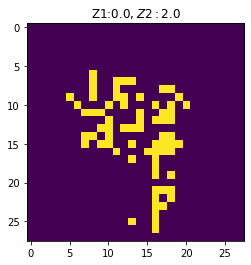

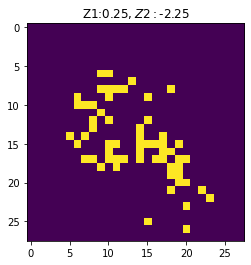

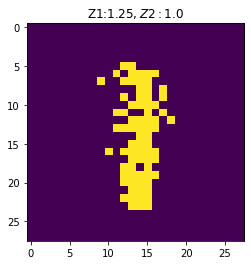

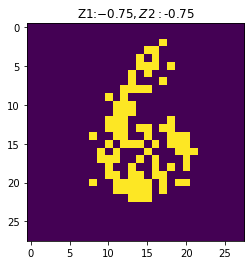

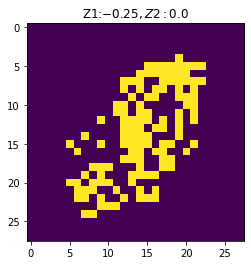

In [11]:
for _ in range(5):
    image, z1, z2 = get_sample_x_z1_z2()
    plt.title(f'Z1:${z1}, Z2:${z2}')
    plt.imshow(image)
    plt.show()

### 3.

For each possible value of
$$
\left(\bar{z}_{1}, \bar{z}_{2}\right) \in\{-3,-2.75, \ldots, 2.75,3\} \times\{-3,-2.75, \ldots, 2.75,3\}
$$
compute the conditional expectation $E\left[X_{1: 784} \mid Z_{1}, Z_{2}=\left(\bar{z}_{1}, \bar{z}_{2}\right)\right] .$ This is the expected image corresponding to each possible value of the latent variables $Z_{1}, Z_{2} .$ Plot the images on on a $2 \mathrm{D}$ grid where the grid axes correspond to $Z_{1}$ and $Z_{2}$ respectively. What is the intuitive role of the $Z_{1}, Z_{2}$ variables in this model? (8 points)

In [12]:
def probs_to_image(l, n):
    return [l[i:i+n] for i in range(0, len(l), n)]

i = -3
j = -3
all_zs = []
for z1_counter in range(25):
    all_zs.append([])
    j = -3
    for z2_counter in range(25):
        all_xi_probs = get_p_x_cond_z1_z2(i, j)
        all_zs[z1_counter].append(probs_to_image(all_xi_probs, 28))
        j += 0.25
    i += 0.25

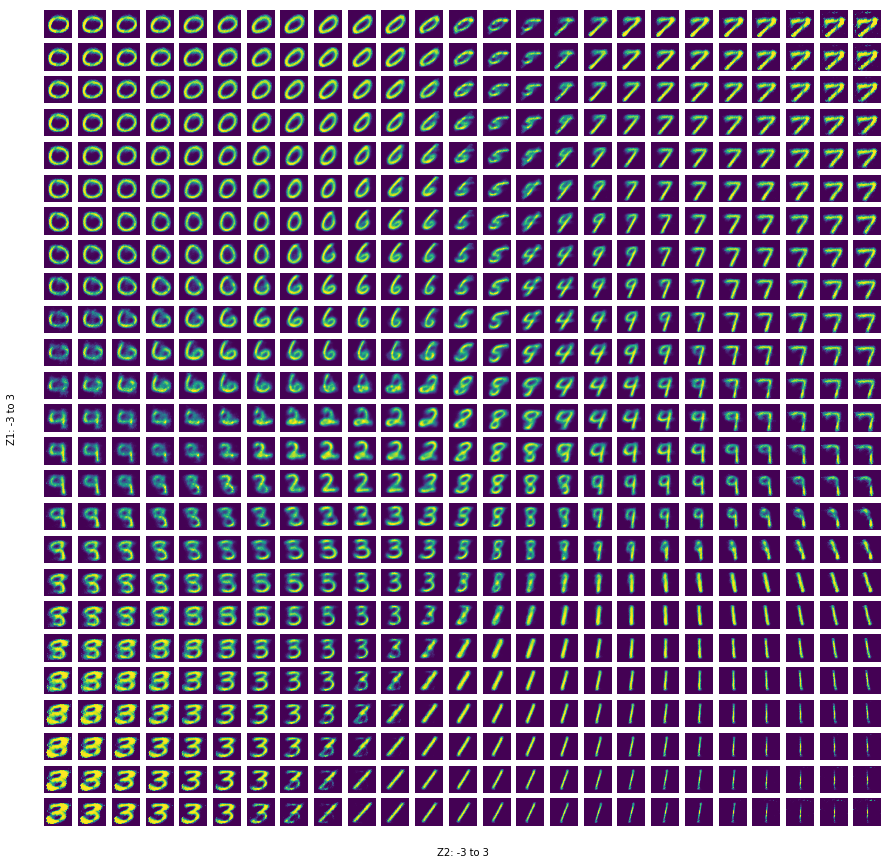

In [13]:
fig, axs = plt.subplots(25, 25,figsize=(15,15))
fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.grid(False)
plt.xlabel("Z2: -3 to 3")
plt.ylabel("Z1: -3 to 3")

for x in range(25):
    for y in range(25):
        axs[x, y].imshow(all_zs[x][y])
        axs[x, y].axis('off')


plt.show()


# As can be seen on the plot, Z1 and Z2, together, decide what the probability of each pixel should be
# for every image. So we can have totally 25*25 = 625 different images(or in our case, digits), based on
# different Z1 and Z2 values and this is because they affect every p(Xi) according to their value to shape
# the image to the appropriate digit. 

In [14]:
mat = loadmat('Helper_codes/testval.mat')
val_data = mat['val_x']
test_data = mat['test_x']

### 4.
You are given a validation and a test dataset. In the test dataset, some images are "real" handwritten digits, and some are anomalous (corrupted images). We would like to use our Bayesian network to distinguish real images from the anomalous ones. Intuitively, our Bayesian network should assign low probability to corrupted images and high probability to the real ones, and we can use this for classification. To do this, we first compute the average marginal log-likelihood,
$$
\log p\left(x_{1: 784}\right)=\log \sum_{z_{1}} \sum_{z_{2}} p\left(z_{1}, z_{2}, x_{1: 784}\right)
$$
on the validation dataset, and the standard deviation (again, standard deviation over the validation set). Consider a simple prediction rule where images with marginal log-likelihood, $\log p\left(x_{1: 784}\right)$, outside three standard deviations of the average marginal log-likelihood are classified as corrupted. Classify images in the test set as corrupted or real using this rule. Then plot a histogram of the marginal log-likelihood for the images classified as "real". Plot a separate histogram of the marginal log-likelihood for the images classified as "corrupted". (15 points)

In [15]:
all_p_x_z1_z2 = []
for i in range(len(disc_z1)):
    all_p_x_z1_z2.append([])
    for j in range(len(disc_z2)):
        all_p_x_z1_z2[i].append(get_p_x_cond_z1_z2(disc_z1[i], disc_z2[j]))

def get_marginal_log_likelyhood(image):
    inverse_val_data = 1 - np.array(image)
    p = 0
    for i in range(len(disc_z1)):
        for j in range(len(disc_z2)):
            p += np.prod(np.absolute(inverse_val_data - all_p_x_z1_z2[i][j])) * get_p_z1(disc_z1[i]) * get_p_z2(disc_z2[j])
    if p == 0:
        return float('inf')
    return np.log10(p)

val_data_log_likelihoods = []
for val in val_data:
    val_likelyhood = get_marginal_log_likelyhood(val)
    val_data_log_likelihoods.append(val_likelyhood)
val_data_avg = np.average(val_data_log_likelihoods)
val_data_std = np.std(val_data_log_likelihoods)
print(f'validation data avaerage: {val_data_avg}')
print(f'validation data std: {val_data_std}')

validation data avaerage: -60.22568675037125
validation data std: 19.739460523430655


In [16]:
def distance_test_from_val_avg(test_likelyhood):
    return np.absolute(test_likelyhood - val_data_avg)
real_images_likelyhoods = []
corrupted_images_likelyhoods = []
for test in test_data:
    test_likelyhood = get_marginal_log_likelyhood(test)
    if test_likelyhood == float('inf'):
        continue
    if distance_test_from_val_avg(test_likelyhood) > 3 * val_data_std:
        corrupted_images_likelyhoods.append(test_likelyhood)
    else:
        real_images_likelyhoods.append(test_likelyhood)

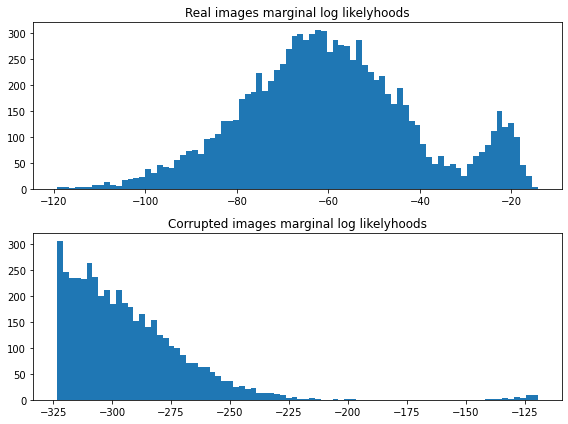

In [17]:
data = []
data.append(real_images_likelyhoods)
data.append(corrupted_images_likelyhoods)
titles = ["Real images marginal log likelyhoods", "Corrupted images marginal log likelyhoods"]


f,a = plt.subplots(2,1, figsize=(8,6))
a = a.ravel()
for idx,ax in enumerate(a):
    ax.hist(data[idx], bins = 82)
    ax.set_title(titles[idx])
plt.tight_layout()

plt.show()

 ### Note that we throw away probabilities = 0 in corrupted images

---

# Q2 (40 Points)

<font size=4>
Author: Mohammad Mahdi Asmae
			<br/>
                <font color=red>
Please run all the cells.
     </font>
</font>
                <br/>
    </div>

# Sampling in Bayesian Network

In this assignment, we will implement diffrent methods of sampling and try to compare the methods by varying queries and number of samples. In the next section you will implement Bayesian Network as a Python class with these methods:

* CPT: returns conditional probability table of nodes
* PMF: returns probability mass function of given query
* Sampling: implementation of different sampling methods
    
We will use following BN in this problem.

<img src="Images/BN.png" width=1400 height=1200 />

In [56]:
############################################################
# import necessary packages in this cell                   #
# please set a random seed to get the same results in      #
# different runs (1 Points)                                #
############################################################
import pandas as pd
import random
import matplotlib.pyplot as plt

In [19]:
# extra space

In [20]:
# extra space

In [36]:
class BN(object):

    def __init__(self) -> None:

        self.n = 6 # We don't take G in counter, because it doesn't have any usage and any CPT.
        self.nodes_list = ['a', 'b', 'e', 'c', 'd', 'f']
        self.node_parents = {
            'a' : [],
            'b' : [],
            'c' : ['a', 'e'],
            'd' : ['a', 'c'],
            'e' : ['b'],
            'f' : ['d']
        }
        
        self.a_cpt = pd.DataFrame({
        'a' : [1, 0],
        'p': [0.8 , 0.2]})
        self.b_cpt = pd.DataFrame({
        'b' : [1, 0], 
        'p' : [0.55 , 0.45]})
        self.c_cpt = pd.DataFrame({
        'c' : [0, 1, 0, 1, 0, 1, 0, 1],
        'a' : [0, 0, 1, 1, 0, 0, 1, 1],
        'e' : [0, 0, 0, 0, 1, 1, 1, 1],
        'p' : [0.3, 0.7, 0.5, 0.5, 0.85, 0.15, 0.95, 0.05]})
        self.d_cpt = pd.DataFrame({
        'd' : [0, 1, 0, 1, 0, 1, 0, 1],
        'a' : [0, 0, 1, 1, 0, 0, 1, 1],
        'c' : [0, 0, 0, 0, 1, 1, 1, 1],
        'p' : [0.2, 0.8, 0.5, 0.5, 0.35, 0.65, 0.33, 0.67]
        })
        self.e_cpt = pd.DataFrame({
            'e' : [1, 1, 0, 0],
            'b' : [1, 0, 1, 0],
            'p' : [0.3, 0.9, 0.7, 0.1]
        })
        self.f_cpt = pd.DataFrame({
            'f' : [1, 1, 0, 0],
            'd' : [1, 0, 1, 0],
            'p' : [0.2, 0.25, 0.8, 0.75]
        })

        self.cpts = {
            'a' : self.a_cpt,
            'b' : self.b_cpt,
            'c' : self.c_cpt,
            'd' : self.d_cpt,
            'e' : self.e_cpt,
            'f' : self.f_cpt
        }
        cols = self.a_cpt.columns[:-1].intersection(self.c_cpt.columns[:-1]).tolist()
        ac = self.a_cpt.merge(self.c_cpt, on=cols)
        ac = ac.assign(p = ac.p_x*ac.p_y).drop(columns=['p_x', 'p_y'])

        cols = ac.columns[:-1].intersection(self.d_cpt.columns[:-1]).tolist()
        acd = ac.merge(self.d_cpt, on=cols)
        acd = acd.assign(p = acd.p_x*acd.p_y).drop(columns=['p_x', 'p_y'])

        cols = acd.columns[:-1].intersection(self.e_cpt.columns[:-1]).tolist()
        acde = acd.merge(self.e_cpt, on=cols)
        acde = acde.assign(p = acde.p_x*acde.p_y).drop(columns=['p_x', 'p_y'])

        cols = acde.columns[:-1].intersection(self.b_cpt.columns[:-1]).tolist()
        acdeb = acde.merge(self.b_cpt, on=cols)
        acdeb = acdeb.assign(p = acdeb.p_x*acdeb.p_y).drop(columns=['p_x', 'p_y'])

        cols = acdeb.columns[:-1].intersection(self.f_cpt.columns[:-1]).tolist()
        self.joint = acdeb.merge(self.f_cpt, on=cols)
        self.joint = self.joint.assign(p = self.joint.p_x*self.joint.p_y).drop(columns=['p_x', 'p_y'])
        
    
    def cpt(self, node, value):
        return self.cpts[node]
    
    def pmf(self, query, evidence) -> float:
        like_p = 0
        for _, row in self.joint.iterrows():
            for q in query:
                variable = q[0]
                value = q[1]
                if row[variable] != value:
                    break
            else:
                for e in evidence:
                    variable = e[0]
                    value = e[1]
                    if row[variable] != value:
                        break
                else:
                    like_p += row['p']

        normalizing_p = 0
        for _, row in self.joint.iterrows():
            for e in evidence:
                variable = e[0]
                value = e[1]
                if row[variable] != value:
                    break
            else:
                normalizing_p += row['p']

        return (like_p / normalizing_p)
        
    
    def sampling(self, query, evidence, sampling_method, num_iter, num_burnin = 1e2) -> float:
        """
        Parameters
        ----------
        query: list
            list of variables an their values
            e.g. [('a', 0), ('e', 1)]
        evidence: list
            list of observed variables and their values
            e.g. [('b', 0), ('c', 1)]
        sampling_method:
            "Prior", "Rejection", "Likelihood Weighting", "Gibbs"
        num_iter:
            number of the generated samples 
        num_burnin:
            (used only in gibbs sampling) number of samples that we ignore at the start for gibbs method to converge
            
        Returns
        -------
        probability: float
            approximate P(query|evidence) calculated by sampling
        """
        ############################################################
        # (27 Points)                                              #
        #     Prior sampling (6 points)                            #
        #     Rejection sampling (6 points)                        #
        #     Likelihood weighting (7 points)                      #
        #     Gibbs sampling (8 points)                      #
        ############################################################
        
        if sampling_method.lower() == 'prior':
            #Prior Sampling
            ## Getting samples
            prior_samples = []
            for _ in range(num_iter):
                sample = {}
                for node in self.nodes_list: 
                    cpt = self.cpt(node, _)
                    father_evidences = {}
                    for father in self.node_parents[node]:
                        father_evidences[father] = sample[father]
                    for _, row in cpt.iterrows():
                        for father_const in father_evidences:
                            if row[father_const] != father_evidences[father_const]:
                                break
                        else:
                            p = row['p']
                            rand = random.random()
                            if rand <= p:
                                sample[node] = row[node]
                            else:
                                sample[node] = 1 - row[node]
                            break
                prior_samples.append(sample)
            
            ##Calculate the probability
            n = 0
            favourable = 0
            for sample in prior_samples:
                for e in evidence:
                    variable = e[0]
                    value = e[1]
                    if sample[variable] != value:
                        break
                else:
                    n += 1 #if matched evidence, then add one to total accepted samples
                    for q in query:
                        variable = q[0]
                        value = q[1]
                        if sample[variable] != value:
                            break
                    else:
                        favourable += 1 #if matched evidence and query, then add to favourable
            return favourable / n #return p
        
        #######
        elif sampling_method.lower() == 'rejection':
            #Rejection Sampling
            ## Getting samples
            evidence_vars = {}
            for e in evidence:
                evidence_vars[e[0]] = e[1]
            rejection_samples = []
            sample_iteration = 0
            while sample_iteration < num_iter:
                sample = {}
                reject_sample = False
                for node in self.nodes_list: 
                    if reject_sample:
                        break
                    cpt = self.cpt(node, "")
                    father_evidences = {}
                    for father in self.node_parents[node]:
                        father_evidences[father] = sample[father]
                    for _, row in cpt.iterrows():
                        for father_const in father_evidences:
                            if row[father_const] != father_evidences[father_const]:
                                break
                        else:
                            p = row['p']
                            rand = random.random()
                            if rand <= p:
                                sample[node] = row[node]
                            else:
                                sample[node] = 1 - row[node]
                            
                            if node in evidence_vars:
                                if evidence_vars[node] != sample[node]:
                                   reject_sample = True 
                            break
                if not reject_sample:
                    rejection_samples.append(sample)
                    sample_iteration += 1

            ##Calculate the probability
            n = num_iter # because we know all the samples are consistant
            favourable = 0
            for sample in rejection_samples:
                for q in query:
                    variable = q[0]
                    value = q[1]
                    if sample[variable] != value:
                        break
                else:
                    favourable += 1 #if matched evidence and query, then add to favourable
            return favourable / n #return p
        
        #########
        elif sampling_method.lower() == 'likelihood weighting':
            #Likelyhood Weighting
            ## Getting samples
            evidence_vars = {}
            for e in evidence:
                evidence_vars[e[0]] = e[1]
            likelyhood_samples = []
            for _ in range(num_iter):
                sample = {}
                sample['weight'] = 1
                for node in self.nodes_list:
                    cpt = self.cpt(node, _)
                    father_evidences = {}
                    for father in self.node_parents[node]:
                        father_evidences[father] = sample[father]
                    if node in evidence_vars:
                        sample[node] = evidence_vars[node]
                        for _, row in cpt.iterrows():
                            if row[node] != evidence_vars[node]:
                                continue
                            for father_const in father_evidences:
                                if father_evidences[father_const] != row[father_const]:
                                    break
                            else:
                                w = row['p']
                                sample['weight'] *= w
                                break
                    else:
                        for _, row in cpt.iterrows():
                            for father_const in father_evidences:
                                if row[father_const] != father_evidences[father_const]:
                                    break
                            else:
                                p = row['p']
                                rand = random.random()
                                if rand <= p:
                                    sample[node] = row[node]
                                else:
                                    sample[node] = 1 - row[node]
                                break
                likelyhood_samples.append(sample)

            ##Calculate probability
            total_w = 0 # we should get the weighted average
            favourable = 0
            for sample in likelyhood_samples:
                total_w += sample['weight']
                for q in query:
                    variable = q[0]
                    value = q[1]
                    if sample[variable] != value:
                        break
                else:
                    favourable += sample['weight'] #if matched evidence and query, then add w to favourable
            return favourable / total_w #return p

        elif sampling_method.lower() == 'gibbs':
            #Gibbs Sampling
            ## Getting samples

            evidence_vars = {}
            for e in evidence:
                evidence_vars[e[0]] = e[1]
            #Generating Inital Random sample
            chosen_sample = {}
            for node in self.nodes_list:
                if node in evidence_vars:
                    chosen_sample[node] = evidence_vars[node]
                else:
                    rand = random.random()
                    if rand > 0.5:
                        chosen_sample[node] = 0
                    else:
                        chosen_sample[node] = 1
            
            number_of_samples = int(num_iter + num_burnin) #because we ignore num_burnin first of samples
            gibbs_samples = []

            ##making samples
            for _ in range(number_of_samples):
                for node in self.nodes_list: #Sample for each node
                    if node in evidence_vars: #if evidence don't touch
                        continue
                    query_to_give_pmf = [(node, 0)]
                    evidence_to_give_pmf = []
                    for evi in chosen_sample:
                        if evi == node:
                            continue
                        evidence_to_give_pmf.append((evi, chosen_sample[evi]))
                    p = self.pmf(query_to_give_pmf, evidence_to_give_pmf)
                    rand = random.random()
                    if rand <= p:
                        chosen_sample[node] = 0
                    else:
                        chosen_sample[node] = 1
                sample = chosen_sample.copy()
                gibbs_samples.append(sample)
            
            
            ##Calculate probability
            throw_away_samples = int(num_burnin)
            gibbs_samples = gibbs_samples[throw_away_samples:]
            # return gibbs_samples
            n = len(gibbs_samples)
            favourable = 0
            for sample in gibbs_samples:
                for q in query:
                    variable = q[0]
                    value = q[1]
                    if sample[variable] != value:
                        break
                else:
                    favourable += 1 #if matched evidence and query, then add to favourable
            return favourable / n #return p
            


In [41]:
# extra space


In [45]:
bn = BN()
pmf_one = bn.pmf([('f', 1)], [('a', 1), ('e', 0)])
pmf_two = bn.pmf([('c', 0), ('b', 1)], [('f', 1), ('d', 0)])

In [48]:
sample_iters = [100, 500, 1000, 3000, 10_000]
sample_methods = ['prior', 'rejection', 'likelihood weighting', 'gibbs']
sample_results_q1 = {}
for sample_method in sample_methods:
    sample_results_q1[sample_method] = {}
    for iter in sample_iters:
        p = bn.sampling([('f', 1)], [('a', 1), ('e', 0)], sample_method, iter)
        sample_results_q1[sample_method][iter] = p

sample_results_q2 = {}
for sample_method in sample_methods:
    sample_results_q2[sample_method] = {}
    for iter in sample_iters:
        p = bn.sampling([('c', 0), ('b', 1)], [('f', 1), ('d', 0)], sample_method, iter)
        sample_results_q2[sample_method][iter] = p

In this part you will compare sampling results with real probabilities for these settings:

* query: $P(F=1|A=1,E=0)$ , $P(C=0,B=1|F=1,D=0)$
* number of samples: 100, 500, 1000, 3000, 10000, 50000

First find the probabilities with inference methods, then find the approximate probabilities for the queries with sampling methods with different number of samples. At the end, you will plot errors of diffrent methods by number of samples.

In [46]:
############################################################
# x-axis: number of samples                                #
# y-axis: error                                            #
# Your plot have to contain errors for all diffrent        #
# methods of sampling that you've implemented (3 Points)   #
############################################################
print(f'P(F=1|A=1,E=0) = {pmf_one}')
print(f'P(C=0,B=1|F=1,D=0) = {pmf_two}')


P(F=1|A=1,E=0) = 0.22074999999999995
P(C=0,B=1|F=1,D=0) = 0.35827365291926233


In [54]:
print ('SAMPLING RESUTLS')
print('-> Query: P(F=1|A=1,E=0)')
print()
for result in sample_results_q1:
    print(f'Method: {result}')
    for iteration in sample_results_q1[result]:
        print(f'iter: {iteration}')
        print(f'P: {sample_results_q1[result][iteration]}')
    print()

print('-> Query: P(C=0,B=1|F=1,D=0)')
print()
for result in sample_results_q2:
    print(f'Method: {result}')
    for iteration in sample_results_q2[result]:
        print(f'iter: {iteration}')
        print(f'P: {sample_results_q2[result][iteration]}')
    print()


SAMPLING RESUTLS
-> Query: P(F=1|A=1,E=0)

Method: prior
iter: 100
P: 0.3333333333333333
iter: 500
P: 0.2254335260115607
iter: 1000
P: 0.1945945945945946
iter: 3000
P: 0.2347235693501455
iter: 10000
P: 0.21761509865599085

Method: rejection
iter: 100
P: 0.32
iter: 500
P: 0.216
iter: 1000
P: 0.234
iter: 3000
P: 0.219
iter: 10000
P: 0.2239

Method: likelihood weighting
iter: 100
P: 0.24876847290640441
iter: 500
P: 0.22895927601809796
iter: 1000
P: 0.23426734037666466
iter: 3000
P: 0.22874462860651404
iter: 10000
P: 0.21305801469205865

Method: gibbs
iter: 100
P: 0.24
iter: 500
P: 0.202
iter: 1000
P: 0.21
iter: 3000
P: 0.21933333333333332
iter: 10000
P: 0.2221

-> Query: P(C=0,B=1|F=1,D=0)

Method: prior
iter: 100
P: 0.4
iter: 500
P: 0.3018867924528302
iter: 1000
P: 0.4552238805970149
iter: 3000
P: 0.3952702702702703
iter: 10000
P: 0.3701550387596899

Method: rejection
iter: 100
P: 0.36
iter: 500
P: 0.36
iter: 1000
P: 0.351
iter: 3000
P: 0.377
iter: 10000
P: 0.3718

Method: likelihood wei

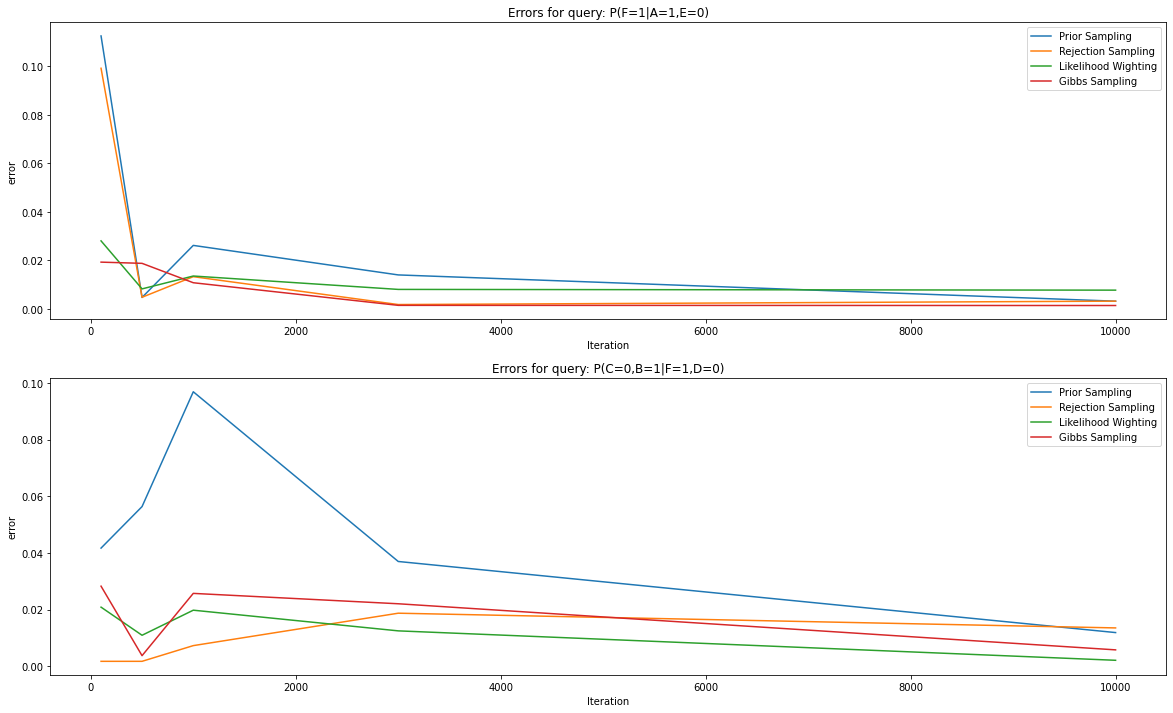

In [98]:
errors_q1 = []
for result in sample_results_q1:
    for iteration in sample_results_q1[result]:
        errors_q1.append(abs(pmf_one - sample_results_q1[result][iteration]))
errors_q2 = []
for result in sample_results_q2:
    for iteration in sample_results_q2[result]:
        errors_q2.append(abs(pmf_two - sample_results_q2[result][iteration]))

fig, (ax1, ax2) = plt.subplots(2,1, figsize=(20,12))

ax1.plot(sample_iters, errors_q1[0:5])
ax1.plot(sample_iters, errors_q1[5:10])
ax1.plot(sample_iters, errors_q1[10:15])
ax1.plot(sample_iters, errors_q1[15:20])
ax1.legend(["Prior Sampling", "Rejection Sampling", 'Likelihood Wighting', 'Gibbs Sampling'])
ax1.set_title("Errors for query: P(F=1|A=1,E=0)")
ax1.set_xlabel("Iteration")
ax1.set_ylabel("error")

ax2.plot(sample_iters, errors_q2[0:5])
ax2.plot(sample_iters, errors_q2[5:10])
ax2.plot(sample_iters, errors_q2[10:15])
ax2.plot(sample_iters, errors_q2[15:20])
ax2.legend(["Prior Sampling", "Rejection Sampling", 'Likelihood Wighting', 'Gibbs Sampling'])
ax2.set_title("Errors for query: P(C=0,B=1|F=1,D=0)")
ax2.set_xlabel("Iteration")
ax2.set_ylabel("error")

plt.show()


For Gibbs sampling, try diffrent burnin values and report the accuracy (or error).

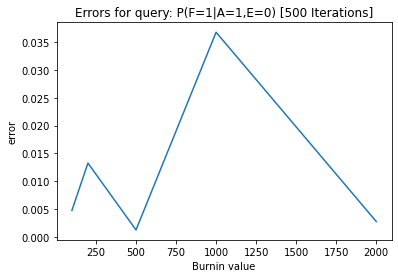

In [107]:
############################################################
# (2 Points)                                         #
############################################################
num_burnins = [100, 200, 500, 1000, 2000]
num_iters_errors_q1 = []
for num_burnin in num_burnins:
    p = bn.sampling([('f', 1)], [('a', 1), ('e', 0)], 'gibbs', 500, num_burnin)
    num_iters_errors_q1.append(abs(p - pmf_one))

plt.plot(num_burnins, num_iters_errors_q1)
plt.title('Errors for query: P(F=1|A=1,E=0) [500 Iterations]')
plt.xlabel('Burnin value')
plt.ylabel('error')
plt.show()

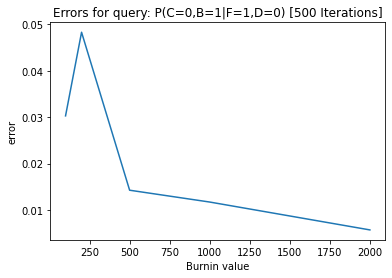

In [111]:
num_iters_errors_q2 = []
for num_burnin in num_burnins:
    p = bn.sampling([('c', 0), ('b', 1)], [('f', 1), ('d', 0)], 'gibbs', 500, num_burnin)
    num_iters_errors_q2.append(abs(p - pmf_two))

plt.plot(num_burnins, num_iters_errors_q2)
plt.title('Errors for query: P(C=0,B=1|F=1,D=0) [500 Iterations]')
plt.xlabel('Burnin value')
plt.ylabel('error')
plt.show()

In [113]:
# So as we get up burnin values, the error comes down and the accuracy goes up as well. 
# Note that since it is a probablistic model, sometime we can have low accuracy even in high burnin values
# and vice versa
# But the main trend in errors is descending
print("ERRORS")
print('-> Query: P(F=1|A=1,E=0)')
print()
for i in range(len(num_burnins)):
    print(f'Burnin value: {num_burnins[i]}')
    print(f'Error: {num_iters_errors_q1[i]}')
    print()
print('-> Query: P(C=0,B=1|F=1,D=0)')
print()
for i in range(len(num_burnins)):
    print(f'Burnin value: {num_burnins[i]}')
    print(f'Error: {num_iters_errors_q2[i]}')
    print()

ERRORS
-> Query: P(F=1|A=1,E=0)

Burnin value: 100
Error: 0.004749999999999949

Burnin value: 200
Error: 0.013250000000000067

Burnin value: 500
Error: 0.0012500000000000566

Burnin value: 1000
Error: 0.03674999999999995

Burnin value: 2000
Error: 0.002749999999999947

-> Query: P(C=0,B=1|F=1,D=0)

Burnin value: 100
Error: 0.030273652919262317

Burnin value: 200
Error: 0.04827365291926233

Burnin value: 500
Error: 0.014273652919262358

Burnin value: 1000
Error: 0.011726347080737665

Burnin value: 2000
Error: 0.005726347080737659



# Q3 (20+ 5 Points)

<font size=4>
Author: Kian Bakhtari
			<br/>
                <font color=red>
Please run all the cells.
     </font>
</font>
                <br/>
    </div>

## The Puerto Princesa ship

At midnight on a fall day in the Philippines, a ship leaves Puerto Princesa City's seaport to Macao, China. After one or two hours, the boat loses its GPS connection because of a technical issue. Captain keeps navigating the ship to its destination, using the stars and four old radio towers, which you can see on the map. Each antenna could measure the ship's coordinates (X, Y) and send them to its receiver. There are five records of towers signals at five different times, available for you in the records.json file. Also, the boat's actual coordinates are available in the real_coordinates.json file. The exact coordinates are ONLY FOR EVALUATION PURPOSES, and you CAN NOT use them as input data. The five dots on the map below are actual coordinates of the ship, at each time step where the records from antennas were received. Also, the map is decorative and is not part of the data.

![Figure3-1](./Images/map.png)

Each tower has a noise that is coming from a gaussian distribution, meaning that every (X, Y) pair that is received from an antenna is actually derived from:

X = sample_from_normal_distribution(mean = X_real, std = antenna's std)
Y = sample_from_normal_distribution(mean = Y_real, std = antenna's std)

Information of radio towers (coordinate and noise standard deviation) is available in the towers_info.json file.

The ship's movement between those five different time steps could be mathematically modeled as follows:
At each time step, the ship moves D units to the north and F units to either east or west (half of the times west, and half of the times east). D and F are both samples from exponential distributions with a scale of Y_STEP and X_STEP, respectively. Those parameters are available in the moving_model.json file.

### Hidden Markov Model

At this point, you can build a simple HMM and estimate the ship's coordinates using the conditional probabilities that you have. For each time step, calculate the ship's coordinates at that time step and previous time steps, using the tower records received up to that time. In simpler words, calculate:<br>

P(coor_0 | records_0)<br>
P(coor_1 | records_0, records_1)<br>
...<br>
P(coor_4 | records_0, records_1, records_2, records_3, records_4)<br>


The actual coordinates of the ship in the first time step (coor_0) is coming from a 2-dimensional guassian distribution with the mean of Puerto Princesa city's coordinates and covarianve matrix of INIT_COV (scalar) times the identity matrix. INIT_COV and coordinates of Puerto Princesa city is availabel in moving_model.json file.

## Libraries

In [112]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import json

from scipy.stats import norm, expon
import scipy
import pandas as pd

## Data

In [83]:
real_coordinates = json.load(open('./inputs/real_coordinates.json'))
pd.DataFrame(real_coordinates)

,X,Y
0,1087.233417,-57.165368
1,1044.936241,72.343990
2,967.051182,392.826826
3,314.440277,1219.678719
4,590.424895,1413.279887


In [84]:
towers_info = json.load(open('./inputs/towers_info.json'))
pd.DataFrame(towers_info)

,1,2,3,4
x,1405,10,210,630
y,600,880,1890,2090
std,60,110,90,80


In [85]:
moving_model = json.load(open('./inputs/moving_model.json'))
moving_model

{'X_STEP': 300,
 'Y_STEP': 600,
 'INIT_COV': 200,
 'Peurto_coordinates': [1105, -50]}

In [86]:
records = json.load(open('./inputs/records.json'))
pd.DataFrame(records)

,Tower1,Tower2,Tower3,Tower4
0,"[994, -36]","[873, -28]","[958, 70]","[1077, -128]"
1,"[1053, 63]","[926, 26]","[961, 110]","[905, 82]"
2,"[956, 389]","[1106, 499]","[1005, 397]","[901, 326]"
3,"[331, 1227]","[377, 1232]","[270, 1282]","[232, 1051]"
4,"[520, 1376]","[577, 1446]","[397, 1456]","[648, 1364]"


## Functions

In [87]:
tower_records = [(records.get('Tower1')[i],
                  records.get('Tower2')[i], 
                  records.get('Tower3')[i], 
                  records.get('Tower4')[i]) for i in range(5)]

In [88]:
tower_records

[([994, -36], [873, -28], [958, 70], [1077, -128]),
 ([1053, 63], [926, 26], [961, 110], [905, 82]),
 ([956, 389], [1106, 499], [1005, 397], [901, 326]),
 ([331, 1227], [377, 1232], [270, 1282], [232, 1051]),
 ([520, 1376], [577, 1446], [397, 1456], [648, 1364])]

In [114]:
# extra space

In [115]:
# extra space

In [118]:
def get_mean_towers_coor(time_step: int, tower_records: list):
    # The average of all four towers measurements at a given time step
    x = np.average([tower_coor[0] for tower_coor in tower_records[time_step]])
    y = np.average([tower_coor[1] for tower_coor in tower_records[time_step]])
    return x, y


def P_coor0(coor0):
    # Distribuiton of initial coordinates (time step 0)
    x0, y0 = coor0
    return scipy.stats.multivariate_normal.pdf([x0, y0], 
                            mean=moving_model.get('Peurto_coordinates'), cov=moving_model.get('INIT_COV'))


# filling these three functions with apropriate codes: (2 points)

def P_coor_given_prevCoor(coor, prev_coor):
    # Probability of coordinates at time step i, given the coordinates of time step i-1

    p_x = expon.pdf(abs(prev_coor[0] - coor[0]), loc=0, scale=moving_model['X_STEP']) / 2 #half the time west and half east
    p_y = expon.pdf(abs(prev_coor[1] - coor[1]), loc=0, scale=moving_model['Y_STEP']) 

    return (p_x, p_y)
    
def P_towerCoor_given_coor(tower_coor, tower_std, coor):
    # Probability of a tower measurement, given the coordinates of the ship
    p_x = norm.pdf(tower_coor[0], coor[0], tower_std)
    p_y = norm.pdf(tower_coor[1], coor[1], tower_std)

    return (p_x, p_y)
    
    
def P_record_given_coor(rec, coor, towers_info):
    # All four measurements of all four towers at time step i, is called the record of thime step i.
    # This function returns the probability of a record given the ship's coordinates.
    p_x, p_y = 1, 1
    index = 1
    for record in rec:
        std = towers_info[str(i)]['std']
        tower_p_x, tower_p_y = P_towerCoor_given_coor(record, std, coor)
        p_x *= tower_p_x
        p_y *= tower_p_y
        index += 1
    
    return(p_x, p_y)
        

In [125]:
# extra space

In [126]:
# extra space

In [152]:
def real_coor(time_step):
    return round(real_coordinates.get('X')[time_step]), round(real_coordinates.get('Y')[time_step])

def dist(coor_a, coor_b):
    return round(np.sqrt((coor_a[0] - coor_b[0])**2 + (coor_a[1] - coor_b[1])**2))

coor0_estimations = []
coor1_estimations = []
coor2_estimations = []
coor3_estimations = []

#### Estimating coordinates_0 from P(coor_0) and record_0

In the cell below, you can see the approach for finding the argmax of P(coor_0 | record_0), which is equal to argmax of P(record_0 | coor_0) times P(coor_0).
We are not using derivatives to find the argmax, we are actually doing it numerically by trying different coordinates and seeing which one provides the highest probability. <br>

#### Recommended approach: You can use gradient descent to find the argmax of probability function, and that will give you 5 extra points.

In [153]:
# argmax P(coor_0 | record_0) = argmax P(record_0 | coor_0) P(coor_0)

best_x0, best_y0 = None, None

max_Px, max_Py = 0, 0
interval, step = 30, 5
# Larger interval and smaller step will lead to a more accurate result, but will increase computational 
# complexity deramaticly. Feel free to use other approaches like running this cell more than once and tighten
# the searching interval with smaller steps. 
# Recommended approach: You can use gradient descent to find the argmax of probability
# function, and that will give you 5 extra points.

towers_mean_x0, towers_mean_y0 = get_mean_towers_coor(0, tower_records)

for x0 in range(int(towers_mean_x0 - interval), int(towers_mean_x0 + interval), step):
    for y0 in range(int(towers_mean_y0 - interval), int(towers_mean_y0 + interval), step):
        
        coor0 = (x0, y0)
        rec0 = tower_records[0]

        P_rec0_given_x0, P_rec0_given_y0 = P_record_given_coor(rec0, coor0, towers_info)
        p_c0 = P_coor0(coor0)
    
        Px = P_rec0_given_x0 * p_c0
        Py = P_rec0_given_y0 * p_c0

        if Px > max_Px:
            best_x0 = x0
            max_Px = Px

        if Py > max_Py:
            best_y0 = y0
            max_Py = Py


coor0_estimations.append((best_x0, best_y0))

In [154]:
print(f'real_coor0: {real_coor(0)} - Estimated_coor0: {best_x0, best_y0}')
print(f'Estimation_error: {dist((best_x0, best_y0), real_coor(0))}')

real_coor0: (1087, -57) - Estimated_coor0: (1000, -50)
Estimation_error: 87


#### Estimating coordinates_0 and coordinates_1 from P(coor_0), record_0, and record_1<br>(4 points)

In [122]:
# extra space

In [123]:
# extra space

In [155]:
# argmax P(coor_0 | record_0, record_1)
# argmax P(coor_1 | coor_0, record_0, record_1)
# = argmax P(record_0 | coor_0) P(coor_0) P(coor_1|coor_0) P(record_1 | coor_1)

max_Px, max_Py = 0, 0
interval, step = 20, 5

best_x0, best_y0 = None, None
best_x1, best_y1 = None, None

towers_mean_x1, towers_mean_y1 = get_mean_towers_coor(1, tower_records)

for x0 in range(int(coor0_estimations[-1][0] - interval), int(coor0_estimations[-1][0] + interval), step):
    for y0 in range(int(coor0_estimations[-1][1] - interval), int(coor0_estimations[-1][1] + interval), step):
        
         for x1 in range(int(towers_mean_x1 - interval), int(towers_mean_x1 + interval), step):
            for y1 in range(int(towers_mean_y1 - interval), int(towers_mean_y1 + interval), step):
                    
                coor0 = (x0, y0)
                coor1 = (x1, y1)

                rec0 = tower_records[0]
                rec1 = tower_records[1]

                #P(coor_0)
                p_coor_0 = P_coor0(coor0)

                #P(coor_1 | coor_0)
                p_coor_1_given_coor0_x, p_coor_1_given_coor0_y = P_coor_given_prevCoor(coor1, coor0)

                #P(record_0 | coor_0)
                p_rec_0_given_coor_0_x,  p_rec_0_given_coor_0_y= P_record_given_coor(rec0, coor0, towers_info)

                #P(record_1 | coor_1)
                p_rec_1_given_coor_1_x, p_rec_1_given_coor_1_y = P_record_given_coor(rec1, coor1, towers_info)

                #p_x and p_y
                p_x = p_coor_0 * p_coor_1_given_coor0_x * p_rec_0_given_coor_0_x * p_rec_1_given_coor_1_x
                p_y = p_coor_0 * p_coor_1_given_coor0_y * p_rec_0_given_coor_0_y * p_rec_1_given_coor_1_y

                if p_x > max_Px:
                    best_x0 = x0
                    best_x1 = x1
                    max_Px = p_x
                
                if p_y > max_Py:
                    best_y0 = y0
                    best_y1 = y1
                    max_Py = p_y
                    
            
coor0_estimations.append((best_x0, best_y0))
coor1_estimations.append((best_x1, best_y1))

In [128]:
# extra space

In [129]:
# extra space

In [156]:
print(f'real_coor0: {real_coor(0)} - Estimated_coor0: {best_x0, best_y0}')
print(f'Estimation_error: {dist((best_x0, best_y0), real_coor(0))}')
print()
print(f'real_coor1: {real_coor(1)} - Estimated_coor1: {best_x1, best_y1}')
print(f'Estimation_error: {dist((best_x1, best_y1), real_coor(1))}')

real_coor0: (1087, -57) - Estimated_coor0: (1015, -50)
Estimation_error: 72

real_coor1: (1045, 72) - Estimated_coor1: (966, 70)
Estimation_error: 79


#### Estimating coordinates_0, coordinates_1 and coordinates_2 from P(coor_0), record_0, record_1, and record_2 <br> (4 points)

In [157]:
# argmax P(coor_0 | record_0, record_1)
# argmax P(coor_1 | coor_0, record_0, record_1)
# argmax P(coor_2 | coor_0, coor_1, record_0, record_1, record_2)
# = argmax P(record_0 | coor_0) P(record_1 | coor_1) P(record_2 | coor_2) P(coor_0) P(coor_1|coor_0) P(coor_2|coor_1) 

max_Px, max_Py = 0, 0
interval, step = 15, 5

best_x0, best_y0 = None, None
best_x1, best_y1 = None, None
best_x2, best_y2 = None, None

towers_mean_x2, towers_mean_y2 = get_mean_towers_coor(2, tower_records)

for x0 in range(int(coor0_estimations[-1][0] - interval), int(coor0_estimations[-1][0] + interval), step):
    for y0 in range(int(coor0_estimations[-1][1] - interval), int(coor0_estimations[-1][1] + interval), step):
        
        for x1 in range(int(coor1_estimations[-1][0] - interval), int(coor1_estimations[-1][0] + interval), step):
            for y1 in range(int(coor1_estimations[-1][1] - interval), int(coor1_estimations[-1][1] + interval), step):

                for x2 in range(int(towers_mean_x2 - interval), int(towers_mean_x2 + interval), step):
                    for y2 in range(int(towers_mean_y2 - interval), int(towers_mean_y2 + interval), step):

                        coor0 = (x0, y0)
                        coor1 = (x1, y1)
                        coor2 = (x2, y2)

                        rec0 = tower_records[0]
                        rec1 = tower_records[1]
                        rec2 = tower_records[2]

                        #P(coor_0)
                        p_coor_0 = P_coor0(coor0)

                        #P(record_0 | coor_0)
                        p_rec_0_given_coor_0_x,  p_rec_0_given_coor_0_y= P_record_given_coor(rec0, coor0, towers_info)

                        #P(record_1 | coor_1)
                        p_rec_1_given_coor_1_x, p_rec_1_given_coor_1_y = P_record_given_coor(rec1, coor1, towers_info)

                        #P(record_2 | coor_2)
                        p_rec_2_given_coor_2_x, p_rec_2_given_coor_2_y = P_record_given_coor(rec2, coor2, towers_info)

                        #P(coor_1 | coor_0)
                        p_coor_1_given_coor0_x, p_coor_1_given_coor0_y = P_coor_given_prevCoor(coor1, coor0)

                        #P(coor_2 | coor_1)
                        p_coor_2_given_coor1_x, p_coor_2_given_coor1_y = P_coor_given_prevCoor(coor2, coor1)

                        #p_x, p_y
                        p_x = p_coor_0 * p_rec_0_given_coor_0_x * p_rec_1_given_coor_1_x * p_rec_2_given_coor_2_x * p_coor_1_given_coor0_x * p_coor_2_given_coor1_x
                        p_y = p_coor_0 * p_rec_0_given_coor_0_y * p_rec_1_given_coor_1_y * p_rec_2_given_coor_2_y * p_coor_1_given_coor0_y * p_coor_2_given_coor1_y

                        if p_x > max_Px:
                            best_x0 = x0
                            best_x1 = x1
                            best_x2 = x2
                            max_Px = p_x

                        if p_y > max_Py:
                            best_y0 = y0
                            best_y1 = y1
                            best_y2 = y2
                            max_Py = p_y 


coor0_estimations.append((best_x0, best_y0))
coor1_estimations.append((best_x1, best_y1))
coor2_estimations.append((best_x2, best_y2))            

In [134]:
# extra space

In [158]:
print(f'real_coor0: {real_coor(0)} - Estimated_coor0: {best_x0, best_y0}')
print(f'Estimation_error: {dist((best_x0, best_y0), real_coor(0))}')
print()
print(f'real_coor1: {real_coor(1)} - Estimated_coor1: {best_x1, best_y1}')
print(f'Estimation_error: {dist((best_x1, best_y1), real_coor(1))}')
print()
print(f'real_coor2: {real_coor(2)} - Estimated_coor2: {best_x2, best_y2}')
print(f'Estimation_error: {dist((best_x2, best_y2), real_coor(2))}')

real_coor0: (1087, -57) - Estimated_coor0: (1025, -50)
Estimation_error: 62

real_coor1: (1045, 72) - Estimated_coor1: (971, 70)
Estimation_error: 74

real_coor2: (967, 393) - Estimated_coor2: (987, 402)
Estimation_error: 22


#### Estimating coordinates_0, coordinates_1, coordinates_2, and coordinates_3 from  P(coor_0), record_0, record_1, record_2, and record_3 <br> (4 points)

In [159]:
# argmax P(coor_0 | record_0, record_1)
# argmax P(coor_1 | coor_0, record_0, record_1)
# argmax P(coor_2 | coor_0, coor_1, record_0, record_1, record_2)
# argmax P(coor_3 | coor_0, coor_1, coor_2, record_0, record_1, record_2, record_3)
# = argmax P(record_0 | coor_0) *  P(record_1 | coor_1) *  P(record_2 | coor_2) * P(record_3 | coor_3)
# P(coor_0) * P(coor_1|coor_0) * P(coor_2|coor_1) * P(coor_3|coor_2)

max_Px, max_Py = 0, 0
interval, step = 10, 5

best_x0, best_y0 = None, None
best_x1, best_y1 = None, None
best_x2, best_y2 = None, None
best_x3, best_y3 = None, None

towers_mean_x3, towers_mean_y3 = get_mean_towers_coor(3, tower_records)

for x0 in range(int(coor0_estimations[-1][0] - interval), int(coor0_estimations[-1][0] + interval), step):
    for y0 in range(int(coor0_estimations[-1][1] - interval), int(coor0_estimations[-1][1] + interval), step):

        for x1 in range(int(coor1_estimations[-1][0] - interval), int(coor1_estimations[-1][0] + interval), step):
            for y1 in range(int(coor1_estimations[-1][1] - interval), int(coor1_estimations[-1][1] + interval), step):

                for x2 in range(int(coor2_estimations[-1][0] - interval), int(coor2_estimations[-1][0] + interval), step):
                    for y2 in range(int(coor2_estimations[-1][1] - interval), int(coor2_estimations[-1][1] + interval), step):

                        for x3 in range(int(towers_mean_x3 - interval), int(towers_mean_x3 + interval), step):
                            for y3 in range(int(towers_mean_y3 - interval), int(towers_mean_y3 + interval), step):

                                coor0 = (x0, y0)
                                coor1 = (x1, y1)
                                coor2 = (x2, y2)
                                coor3 = (x3, y3)

                                rec0 = tower_records[0]
                                rec1 = tower_records[1]
                                rec2 = tower_records[2]
                                rec3 = tower_records[3]

                                #P(coor_0)
                                p_coor_0 = P_coor0(coor0)

                                #P(record_0 | coor_0)
                                p_rec_0_given_coor_0_x,  p_rec_0_given_coor_0_y= P_record_given_coor(rec0, coor0, towers_info)

                                #P(record_1 | coor_1)
                                p_rec_1_given_coor_1_x, p_rec_1_given_coor_1_y = P_record_given_coor(rec1, coor1, towers_info)

                                #P(record_2 | coor_2)
                                p_rec_2_given_coor_2_x, p_rec_2_given_coor_2_y = P_record_given_coor(rec2, coor2, towers_info)

                                #P(record_3 | coor_3)
                                p_rec_3_given_coor_3_x, p_rec_3_given_coor_3_y = P_record_given_coor(rec3, coor3, towers_info)

                                #P(coor_1 | coor_0)
                                p_coor_1_given_coor0_x, p_coor_1_given_coor0_y = P_coor_given_prevCoor(coor1, coor0)

                                #P(coor_2 | coor_1)
                                p_coor_2_given_coor1_x, p_coor_2_given_coor1_y = P_coor_given_prevCoor(coor2, coor1)

                                #P(coor_3 | coor_2)
                                p_coor_3_given_coor2_x, p_coor_3_given_coor2_y = P_coor_given_prevCoor(coor3, coor2)

                                #p_x, p_y
                                p_x = (p_coor_0 * p_rec_0_given_coor_0_x * p_rec_1_given_coor_1_x * p_rec_2_given_coor_2_x
                                * p_rec_3_given_coor_3_x * p_coor_1_given_coor0_x * p_coor_2_given_coor1_x * p_coor_3_given_coor2_x)

                                p_y = (p_coor_0 * p_rec_0_given_coor_0_y * p_rec_1_given_coor_1_y * p_rec_2_given_coor_2_y
                                * p_rec_3_given_coor_3_y * p_coor_1_given_coor0_y * p_coor_2_given_coor1_y * p_coor_3_given_coor2_y)

                                if p_x > max_Px:
                                    best_x0 = x0
                                    best_x1 = x1
                                    best_x2 = x2
                                    best_x3 = x3
                                    max_Px = p_x

                                if p_y > max_Py:
                                    best_y0 = y0
                                    best_y1 = y1
                                    best_y2 = y2
                                    best_y3 = y3
                                    max_Py = p_y  


coor0_estimations.append((best_x0, best_y0))
coor1_estimations.append((best_x1, best_y1))
coor2_estimations.append((best_x2, best_y2)) 
coor3_estimations.append((best_x3, best_y3)) 

In [139]:
# extra space

In [160]:
print(f'real_coor0: {real_coor(0)} - Estimated_coor0: {best_x0, best_y0}')
print(f'Estimation_error: {dist((best_x0, best_y0), real_coor(0))}')
print()
print(f'real_coor1: {real_coor(1)} - Estimated_coor1: {best_x1, best_y1}')
print(f'Estimation_error: {dist((best_x1, best_y1), real_coor(1))}')
print()
print(f'real_coor2: {real_coor(2)} - Estimated_coor2: {best_x2, best_y2}')
print(f'Estimation_error: {dist((best_x2, best_y2), real_coor(2))}')
print()
print(f'real_coor3: {real_coor(3)} - Estimated_coor3: {best_x3, best_y3}')
print(f'Estimation_error: {dist((best_x3, best_y3), real_coor(3))}')

real_coor0: (1087, -57) - Estimated_coor0: (1030, -50)
Estimation_error: 57

real_coor1: (1045, 72) - Estimated_coor1: (971, 70)
Estimation_error: 74

real_coor2: (967, 393) - Estimated_coor2: (982, 402)
Estimation_error: 17

real_coor3: (314, 1220) - Estimated_coor3: (307, 1193)
Estimation_error: 28


As you know from the theoretical aspect, and you can see from your results, the errors of estimations decrease when you use more records and conditional probabilities.

#### Plot curves that show using more records, leads to decrease of estimation error.<br>( 6 points)


In [161]:
#calculating errors
#errors coor_0
errors_coor_0 = []
for zero in coor0_estimations:
    errors_coor_0.append(dist(zero, real_coor(0)))

#errors coor_1
errors_coor_1 = []
for one in coor1_estimations:
    errors_coor_1.append(dist(one, real_coor(1)))

#errors coor_2
errors_coor_2 = []
for two in coor2_estimations:
    errors_coor_2.append(dist(two, real_coor(2)))

#errors coor_3
errors_coor_3 = []
for three in coor3_estimations:
    errors_coor_3.append(dist(three, real_coor(3)))

print(f'Errors coor_0 : {errors_coor_0}')
print(f'Errors coor_1 : {errors_coor_1}')
print(f'Errors coor_2 : {errors_coor_2}')
print(f'Errors coor_3 : {errors_coor_3}')

Errors coor_0 : [87, 72, 62, 57]
Errors coor_1 : [79, 74, 74]
Errors coor_2 : [22, 17]
Errors coor_3 : [28]


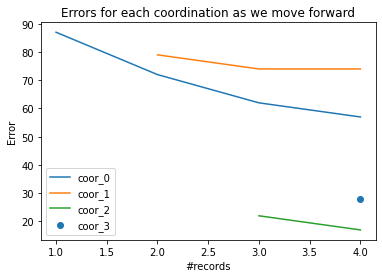

In [162]:
x_axis = [1, 2, 3, 4]
plt.plot(x_axis, errors_coor_0)
plt.plot(x_axis[1:], errors_coor_1)
plt.plot(x_axis[2:], errors_coor_2)
plt.scatter(x_axis[3:], errors_coor_3)
plt.title("Errors for each coordination as we move forward")
plt.xlabel("#records")
plt.ylabel("Error")
plt.legend(["coor_0", "coor_1", "coor_2", "coor_3"])
plt.show()

In [146]:
#As we can see in the above plot, the main trend is decreasing as we give more records.